<a href="https://colab.research.google.com/github/jvmorenot1/Taller1_Ciencia_Datos/blob/main/Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/datascience-uniandes/eda-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 1 - Exploratory Data Analysis (EDA)
John Moreno Triviño Cod. 202210162
MINE-4101: Applied Data Science  
Universidad de los Andes  
  
**Dataset:** AirBnb Listings - Buenos Aires, Argentina [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)].

**Business Context:** Se desea recomiendar a un grupo de inversionistas un pequeño conjunto de sectores, tipos de propiedades, rangos de precios, amenities, entre otros factores de su elección, en los cuales deberían invertir en la ciudad de Buenos Aires.

Última modificación: septiembre, 2023

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Loading the data

In [4]:
# Loading the CSV file as dataframe
listings_df = pd.read_csv("./listings.csv.gz")

In [5]:
# Showing dataframe dimensions
listings_df.shape

(26204, 75)

In [22]:
# Showing column types
listings_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [69]:
listings_df.sample(10) # Showing a sample of n rows

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_float
23287,876697375279935129,https://www.airbnb.com/rooms/876697375279935129,20230628025456,2023-06-28,city scrape,Home in Buenos Aires · ★4.80 · 1 bedroom · 1 b...,El Art Factory San Telmo ofrece murales pintad...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,435215806,https://www.airbnb.com/users/show/435215806,Art Factory,2021-12-08,"Buenos Aires, Argentina",Art Factory San Telmo is a huge and colorful o...,within an hour,100%,86%,NaN,https://a0.muscache.com/im/pictures/user/9bd93...,https://a0.muscache.com/im/pictures/user/9bd93...,NaN,4,4,"['email', 'phone']",t,t,NaN,Monserrat,NaN,-34.614479,-58.377608,Private room in home,Private room,2,NaN,1 bath,NaN,1.0,"[""Hot water"", ""Fire extinguisher"", ""Paid parki...","$5,095.00",1,365,1,1,365,365,1.0,365.0,NaN,t,14,42,72,347,2023-06-28,10,10,4,2023-04-26,2023-06-26,4.80,4.50,4.60,5.00,4.90,4.90,4.70,NaN,f,4,0,4,0,4.69,5095.0
21254,841279249244474958,https://www.airbnb.com/rooms/841279249244474958,20230628025456,2023-06-28,city scrape,Rental unit in Buenos Aires · ★5.0 · 2 bedroom...,Disfrutá de la sencillez de este alojamiento t...,NaN,https://a0.muscache.com/pictures/647f6e83-ae6a...,482507798,https://www.airbnb.com/users/show/482507798,Matias,2022-10-06,"Buenos Aires, Argentina",NaN,within an hour,100%,95%,t,https://a0.muscache.com/im/pictures/user/eea6d...,https://a0.muscache.com/im/pictures/user/eea6d...,NaN,1,1,"['email', 'phone']",t,t,NaN,Palermo,NaN,-34.593996,-58.427743,Entire rental unit,Entire home/apt,3,NaN,1 bath,2.0,2.0,"[""Portable fans"", ""Hot water"", ""Bidet"", ""TV"", ...","$7,717.00",1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,1,3,15,273,2023-06-28,21,21,2,2023-03-12,2023-06-19,5.00,5.00,4.86,5.00,5.00,5.00,5.00,NaN,t,1,1,0,0,5.78,7717.0
25528,910438978885189717,https://www.airbnb.com/rooms/910438978885189717,20230628025456,2023-06-29,city scrape,Rental unit in Buenos Aires · ★New · 1 bedroom...,Creá recuerdos inolvidables en este alojamient...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,3262657,https://www.airbnb.com/users/show/3262657,Euge,2012-08-14,"Buenos Aires, Argentina","Soy Huesped y anfitrióna , respeto mucho cada ...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/5e0f9...,https://a0.muscache.com/im/pictures/user/5e0f9...,Palermo Hollywood,11,11,"['email', 'phone']",t,t,NaN,Palermo,NaN,-34.566283,-58.433853,Entire rental unit,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Essentials"", ""Air conditioning"", ""Kitchen"", ...","$10,857.00",1,365,1,1,1125,1125,1.0,1125.0,NaN,t,17,47,77,166,2023-06-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,9,9,0,0,NaN,10857.0
14728,674732855882226926,https://www.airbnb.com/r

## 2. Univariate analysis

**Tamaño de los datos**

In [23]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
listings_df["id"].nunique()

26204

**Barrios**

In [24]:
# Showing unique values of neighbourhoods
listings_df["neighbourhood_cleansed"].unique()

array(['Palermo', 'Recoleta', 'Nuñez', 'Monserrat', 'Balvanera', 'Retiro',
       'Constitucion', 'Barracas', 'San Nicolas', 'Chacarita', 'Almagro',
       'Puerto Madero', 'Villa Crespo', 'Belgrano', 'Coghlan',
       'Parque Chacabuco', 'San Cristobal', 'Villa Urquiza', 'San Telmo',
       'Boedo', 'Colegiales', 'Boca', 'Caballito', 'Villa Luro',
       'Villa Devoto', 'Saavedra', 'Flores', 'Monte Castro',
       'Villa Ortuzar', 'Villa Gral. Mitre', 'Velez Sarsfield',
       'Parque Patricios', 'Villa Del Parque', 'Floresta', 'Paternal',
       'Villa Pueyrredon', 'Villa Santa Rita', 'Liniers', 'Agronomia',
       'Parque Avellaneda', 'Villa Real', 'Parque Chas', 'Villa Lugano',
       'Versalles', 'Nueva Pompeya', 'Villa Riachuelo', 'Villa Soldati',
       'Mataderos'], dtype=object)

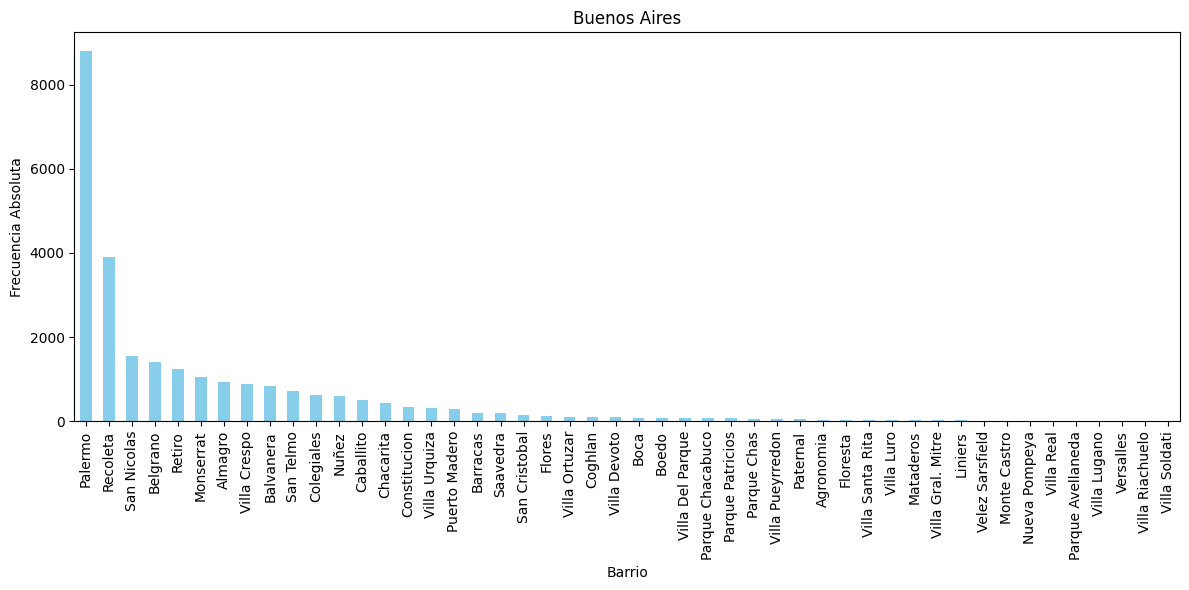

In [27]:
# Graficando los barrios de las propiedades por frecuencia
frequencies = listings_df['neighbourhood_cleansed'].value_counts()
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
frequencies.plot(kind='bar', color='skyblue')
plt.xlabel('Barrio')
plt.ylabel('Frecuencia Absoluta')
plt.title('Buenos Aires')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

**Tipos de propiedad**

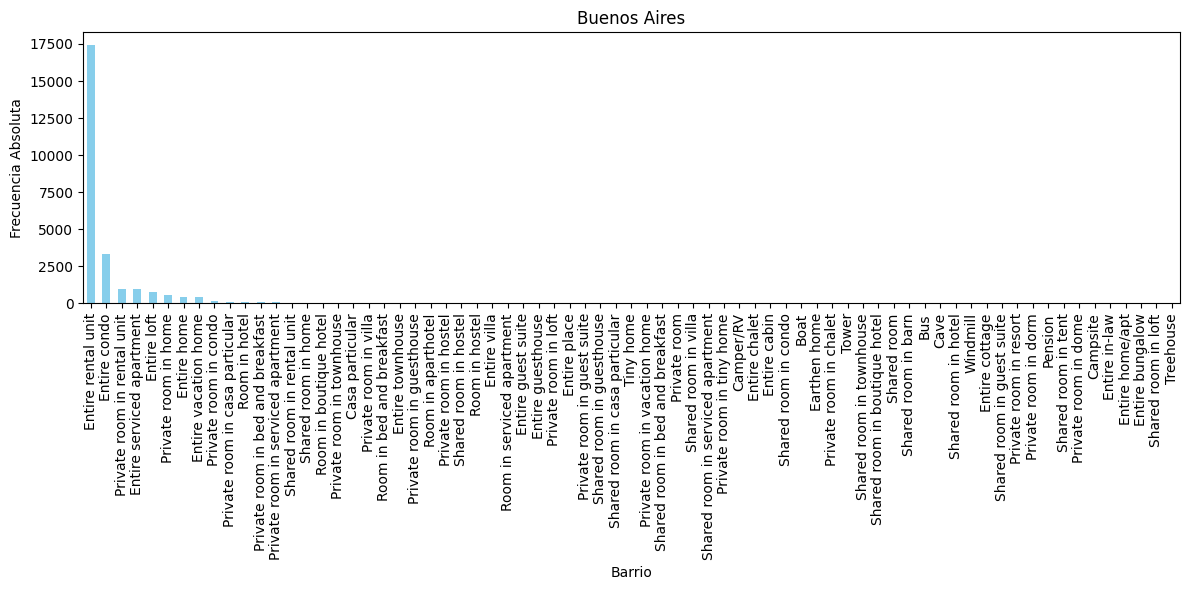

In [30]:
# Graficando los tipos de propiedad por frecuencia
frequencies = listings_df['property_type'].value_counts()
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
frequencies.plot(kind='bar', color='skyblue')
plt.xlabel('Barrio')
plt.ylabel('Frecuencia Absoluta')
plt.title('Buenos Aires')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

In [31]:
# Calculating the relative frecuency of room types
listings_df["room_type"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

Entire home/apt    0.898947
Private room       0.089414
Shared room        0.007861
Hotel room         0.003778
Name: room_type, dtype: float64

In [37]:
# Calculating basic statistics of accommodates
listings_df["accommodates"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    26204.000000
mean         2.875248
std          1.480234
min          1.000000
5%           1.000000
25%          2.000000
50%          2.000000
75%          4.000000
95%          5.000000
max         16.000000
Name: accommodates, dtype: float64

**Precios**

In [41]:
# We need to transform the price attribute from object to float
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

In [40]:
listings_df["price_float"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    2.620400e+04
mean     1.752933e+04
std      1.754018e+05
min      1.750000e+02
5%       4.331000e+03
25%      7.406500e+03
50%      1.019000e+04
75%      1.528600e+04
95%      3.397675e+04
max      2.529509e+07
Name: price_float, dtype: float64

In [35]:
# Let's make some calculations for determining an outlier threshold
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

[]

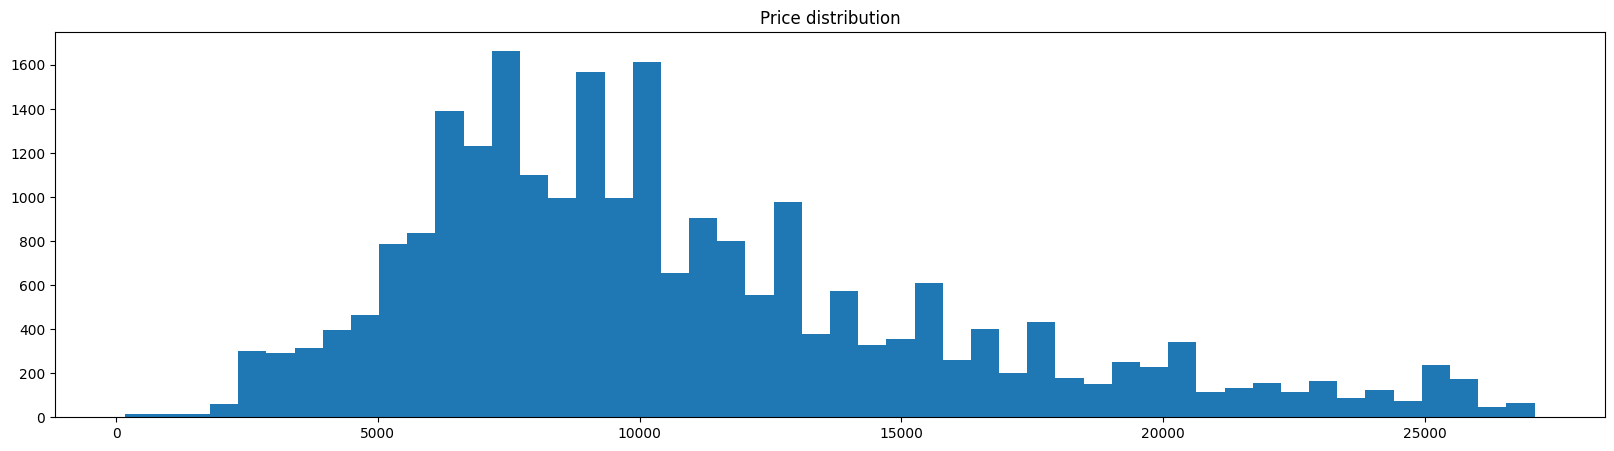

In [36]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

**Disponibilidad a 30 días**

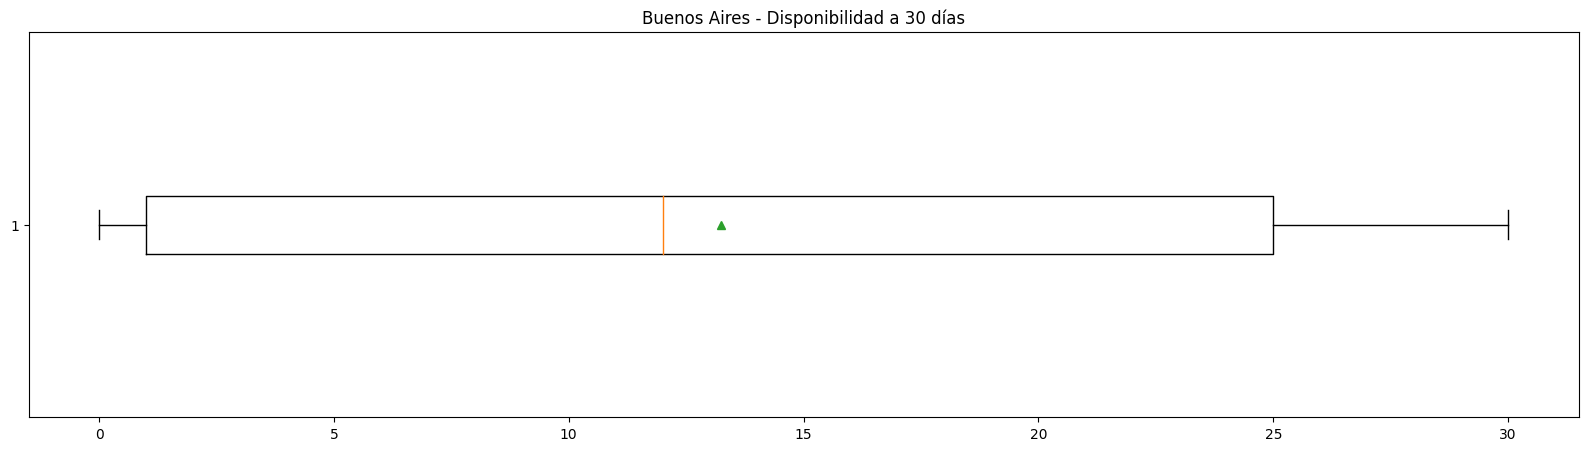

In [46]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["availability_30"], showmeans=True, vert=False)
plt.title("Buenos Aires - Disponibilidad a 30 días")
plt.show()

**Número de opiniones en el último año**

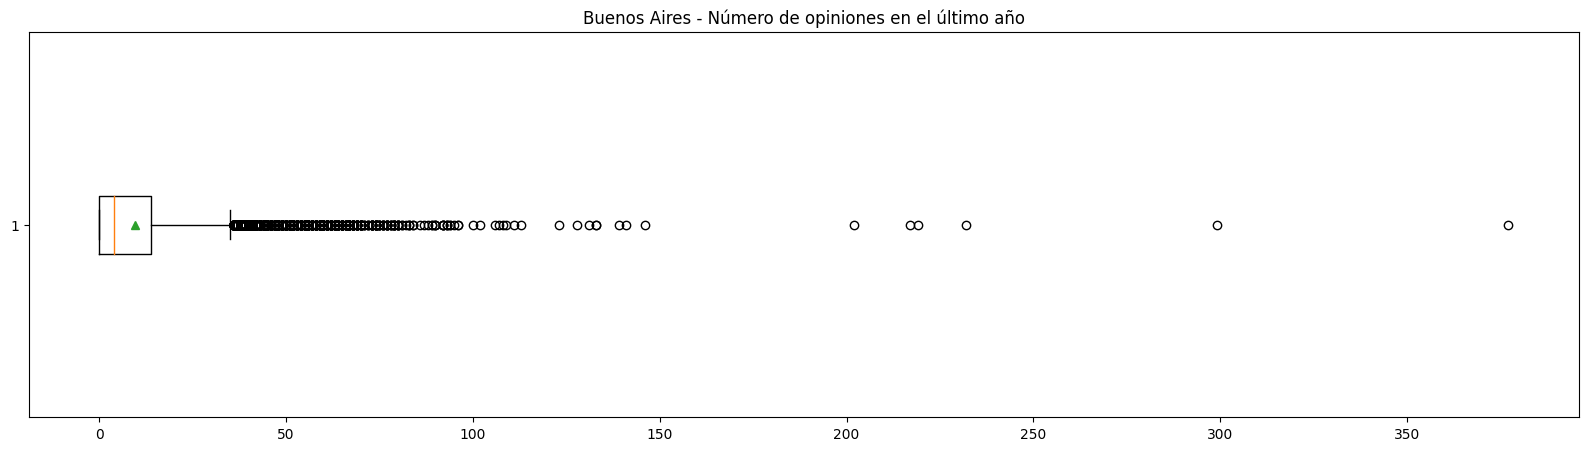

In [44]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["number_of_reviews_ltm"], showmeans=True, vert=False)
plt.title("Buenos Aires - Número de opiniones en el último año")
plt.show()

**Otros atributos de interés**

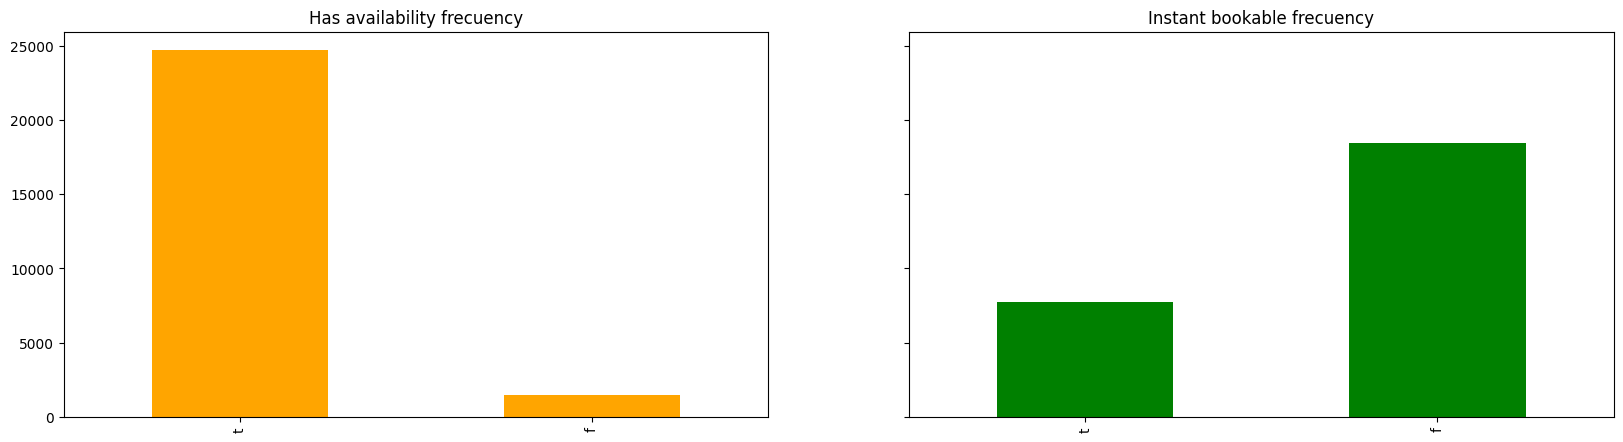

In [18]:
# Plotting bar charts for has availability and instant bookable
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
listings_df["has_availability"].value_counts().plot(kind="bar", ax=ax1, color="orange")
listings_df["instant_bookable"].value_counts().sort_index(ascending=False).plot(kind="bar", ax=ax2, color="green")
ax1.set_title("Has availability frecuency")
ax2.set_title("Instant bookable frecuency")
plt.show()

## 2. Bivariate analysis

**2.1 Barrios**

**Ocupación futura (a 30 días) vs. Número de opiniones en el último año:**

In [72]:
listings_sample_df =  listings_df.sample(frac=0.1)
listings_sample_df.shape

(2620, 76)

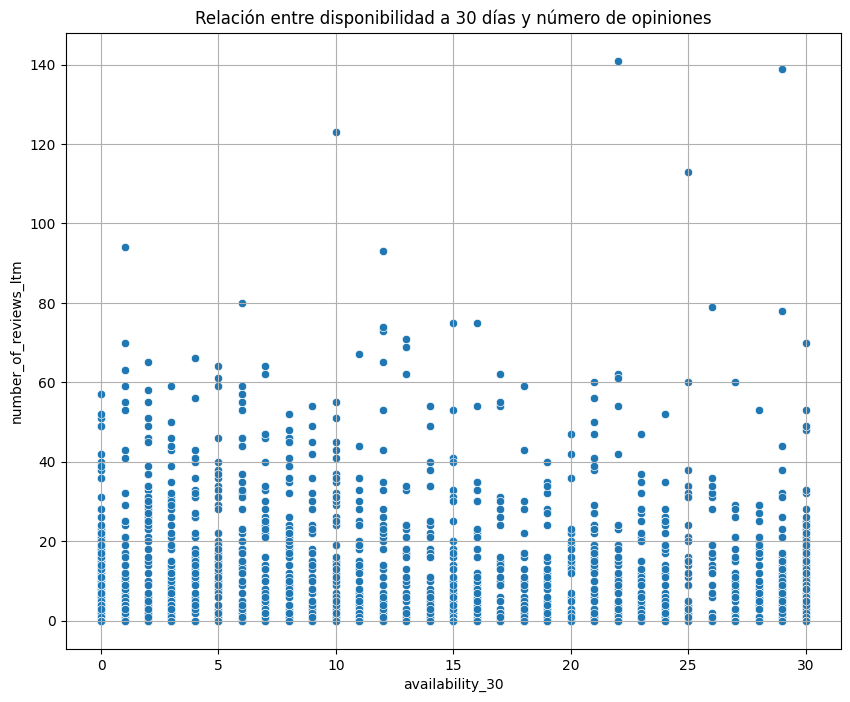

In [88]:
# Relación entre ocupación y número de opiniones
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["availability_30"],
    y=listings_sample_df["number_of_reviews_ltm"]
)
plt.title("Relación entre disponibilidad a 30 días y número de opiniones")
plt.grid()
plt.show()

**Disponibilidad a 30 días vs. Barrio:**

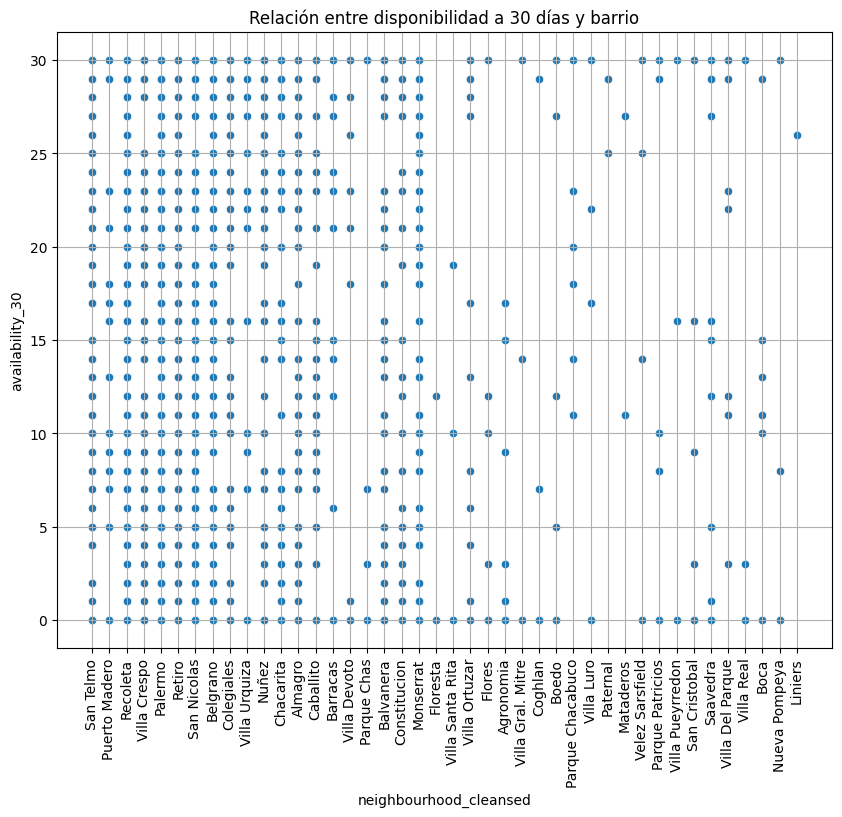

In [89]:
# Relación entre ocupación y número de opiniones
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["neighbourhood_cleansed"],
    y=listings_sample_df["availability_30"]
)
plt.title("Relación entre disponibilidad a 30 días y barrio")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid()
plt.show()

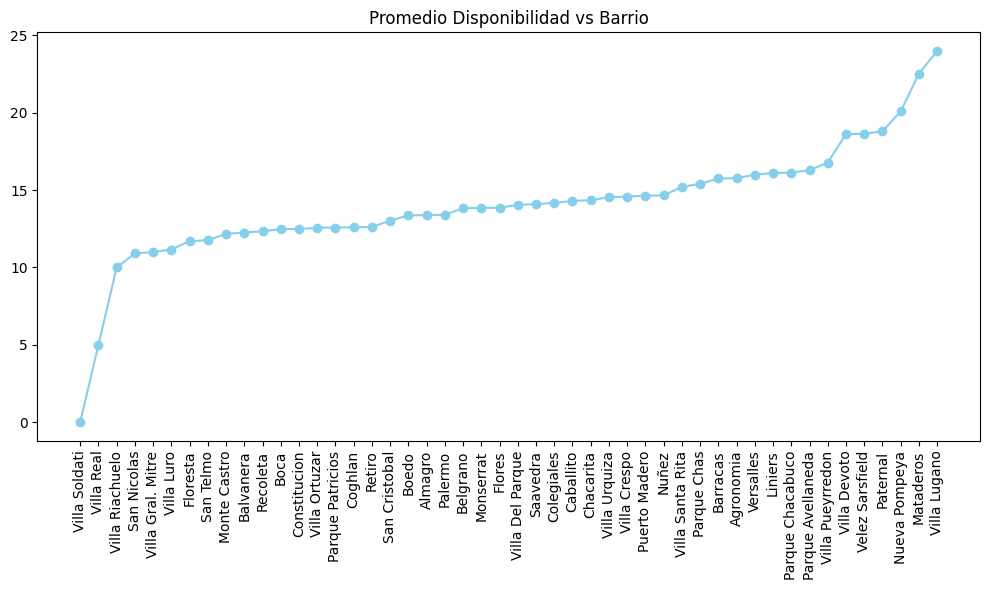

In [87]:
promedios = listings_df.groupby('neighbourhood_cleansed')['availability_30'].mean()
promedios = promedios.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
plt.plot(promedios.index, promedios.values, marker='o', color='skyblue', linestyle='-')
plt.title('Promedio Disponibilidad vs Barrio')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

**Número de opiniones en el último año vs. Barrio:**

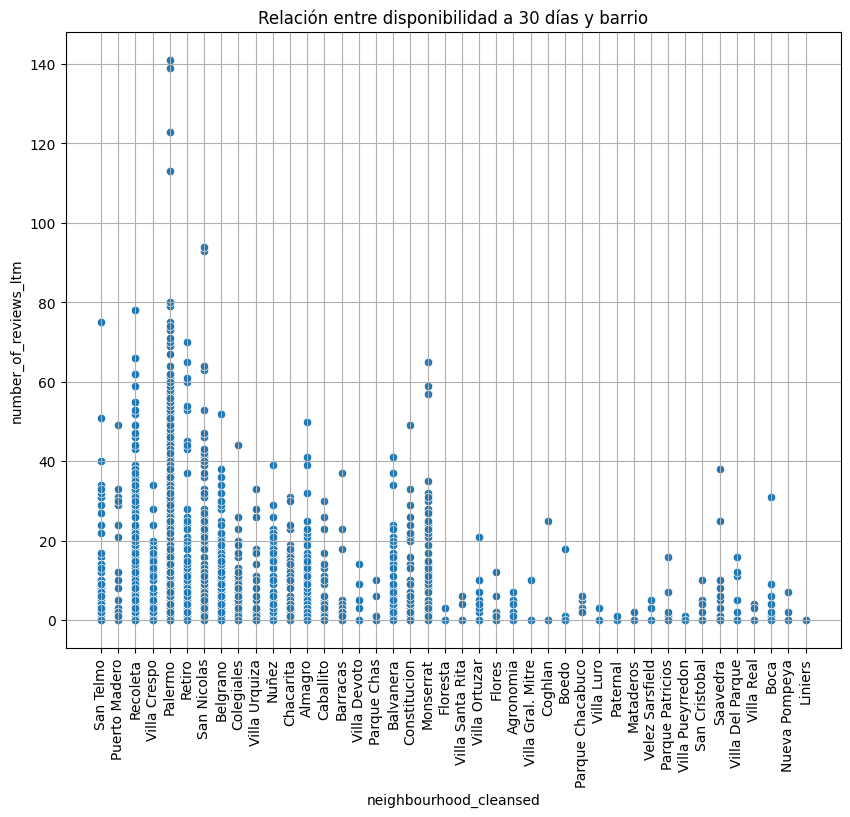

In [81]:
# Relación entre barrio y número de opiniones
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["neighbourhood_cleansed"],
    y=listings_sample_df["number_of_reviews_ltm"]
)
plt.title("Relación entre disponibilidad a 30 días y barrio")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid()
plt.show()

**2.2 Tipo de propiedad/habitación**

**Disponibilidad a 30 días vs. Tipo de propiedad:**

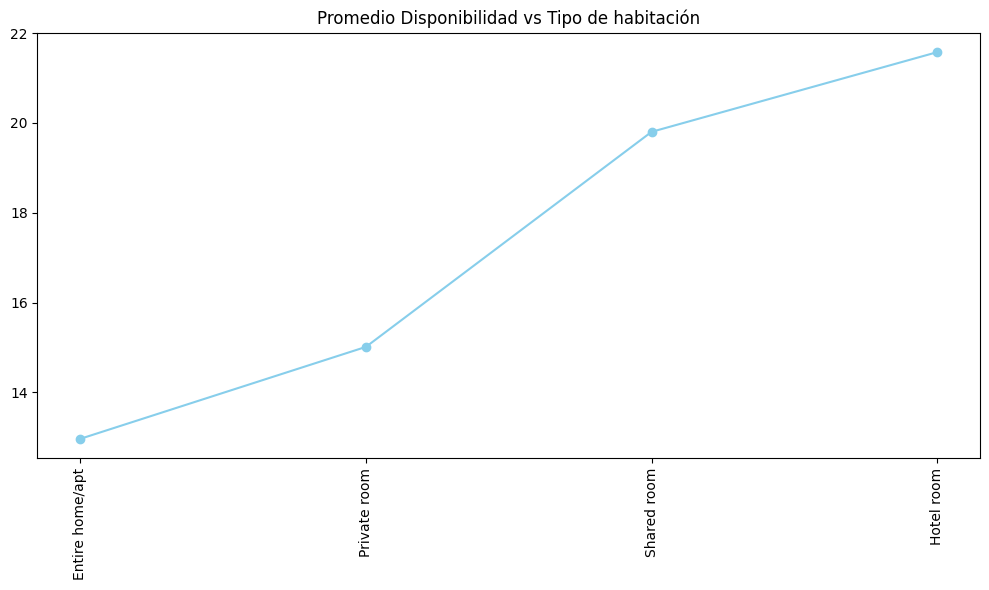

In [97]:
promedios = listings_df.groupby('room_type')['availability_30'].mean()
promedios = promedios.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
plt.plot(promedios.index, promedios.values, marker='o', color='skyblue', linestyle='-')
plt.title('Promedio Disponibilidad vs Tipo de habitación')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

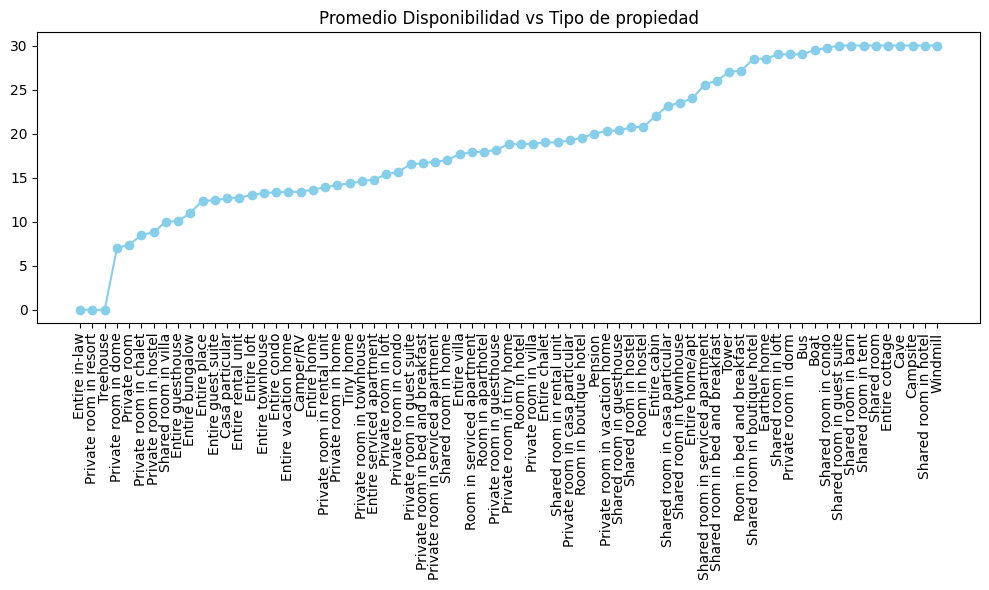

In [94]:
promedios = listings_df.groupby('property_type')['availability_30'].mean()
promedios = promedios.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
plt.plot(promedios.index, promedios.values, marker='o', color='skyblue', linestyle='-')
plt.title('Promedio Disponibilidad vs Tipo de propiedad')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

**Número de opiniones en el último año vs. Tipo de propiedad:**

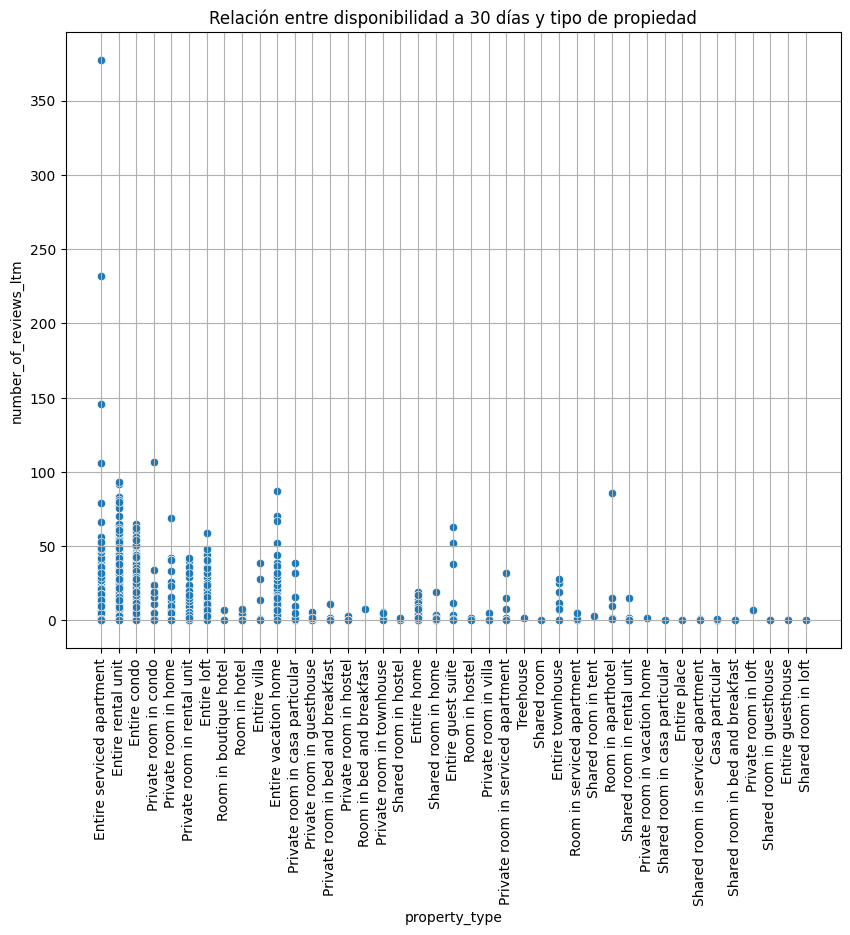

In [98]:
# Relación entre tipo de propiedad y número de opiniones
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["property_type"],
    y=listings_sample_df["number_of_reviews_ltm"]
)
plt.title("Relación entre disponibilidad a 30 días y tipo de propiedad")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid()
plt.show()

**2.3 Precios: propiedades enteras y habitaciones privadas**



In [116]:
barrios_interes = ['San Telmo', 'Recoleta', 'Palermo', 'Retiro', 'San Nicolas', 'Belgrano', 'Almagro', 'Balvanera', 'Constitución', 'Monserrat']

# Se filtra solamente para los barrios de interés, según los ejercicios anteriores
listings_df_barrios_interes = listings_df[listings_df['neighbourhood_cleansed'].isin(barrios_interes)]

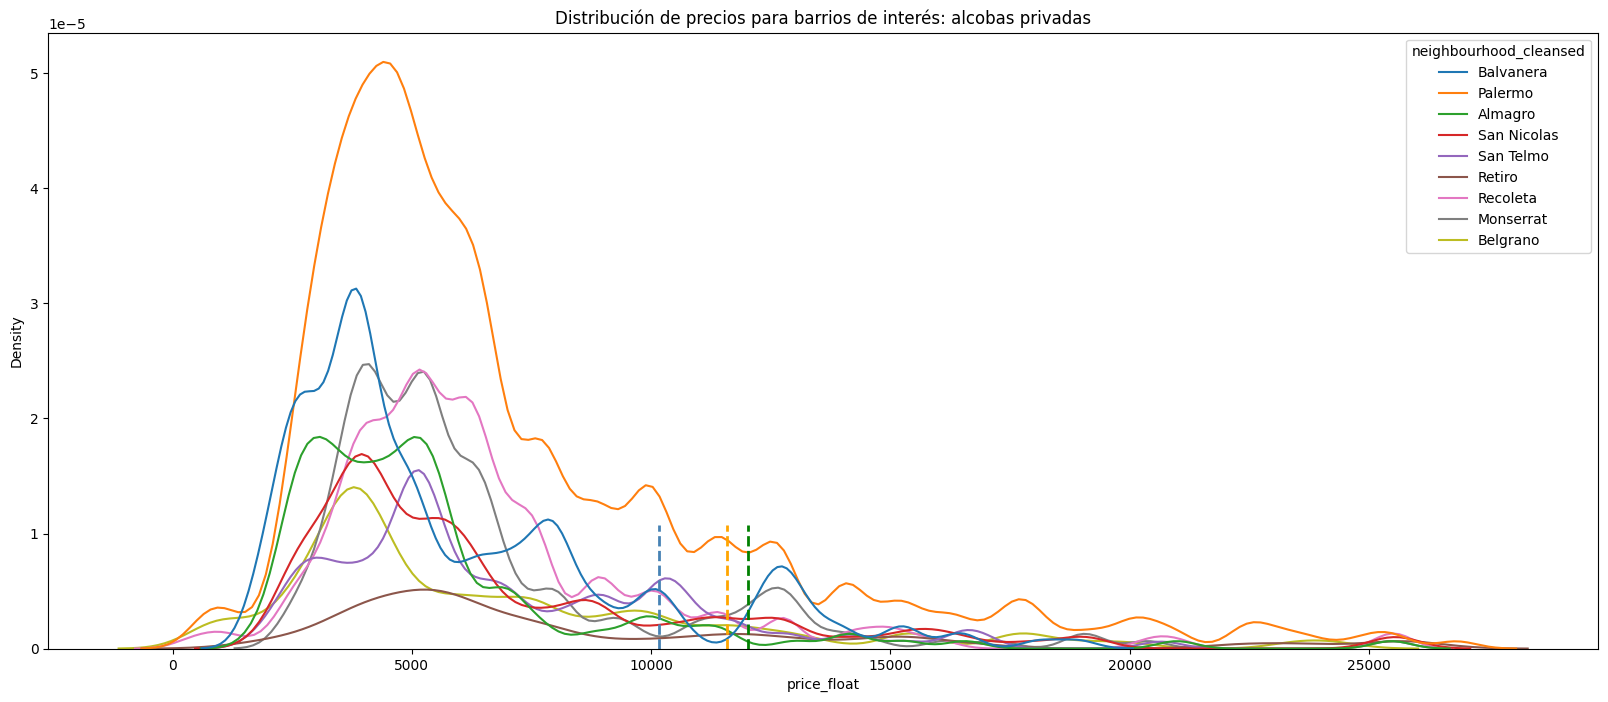

In [123]:
# Plotting price distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(barrios_interes)].loc[listings_df["room_type"] == 'Private room'],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(barrios_interes, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Distribución de precios para barrios de interés: alcobas privadas")
plt.show()

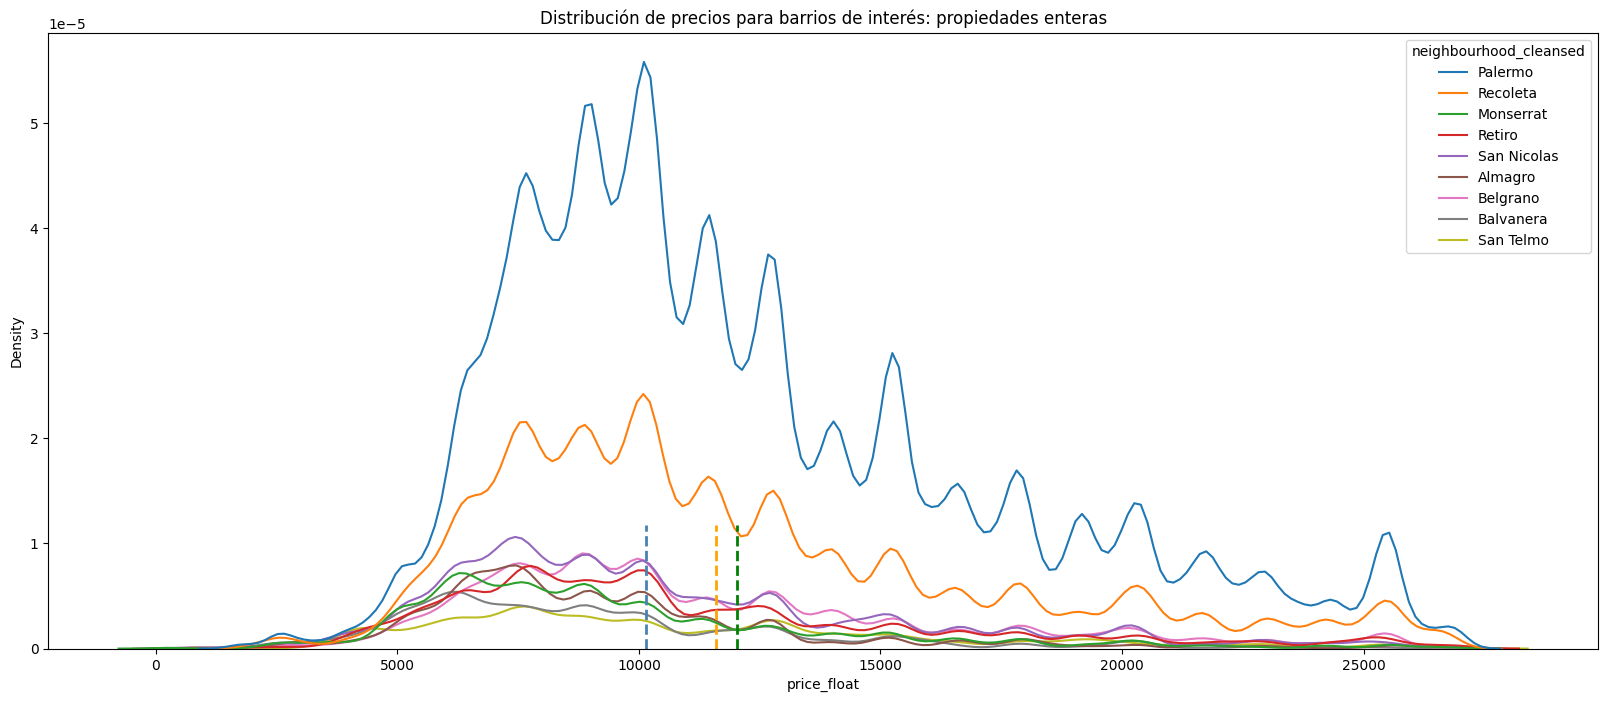

In [124]:
# Plotting price distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(barrios_interes)].loc[listings_df["room_type"] == 'Entire home/apt'],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(barrios_interes, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Distribución de precios para barrios de interés: propiedades enteras")
plt.show()

**2.4 Otros análisis de dos variables**

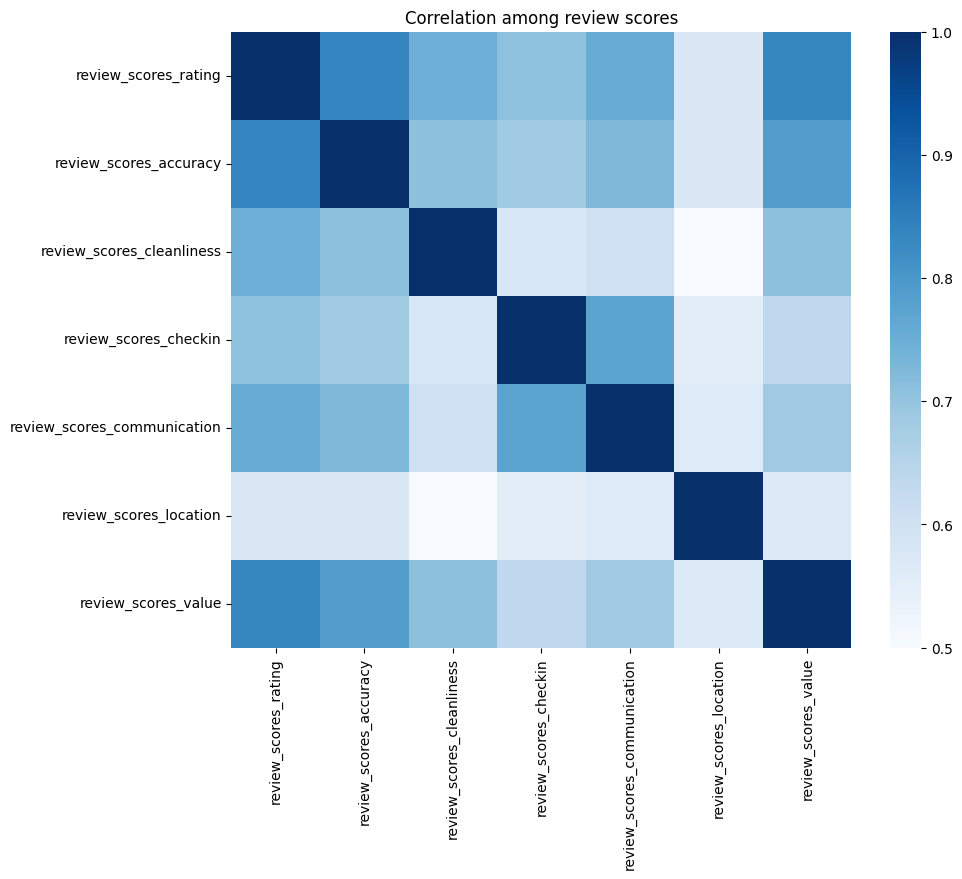

In [100]:
# Plotting correlation heatmap among review scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_df[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation among review scores")
plt.show()

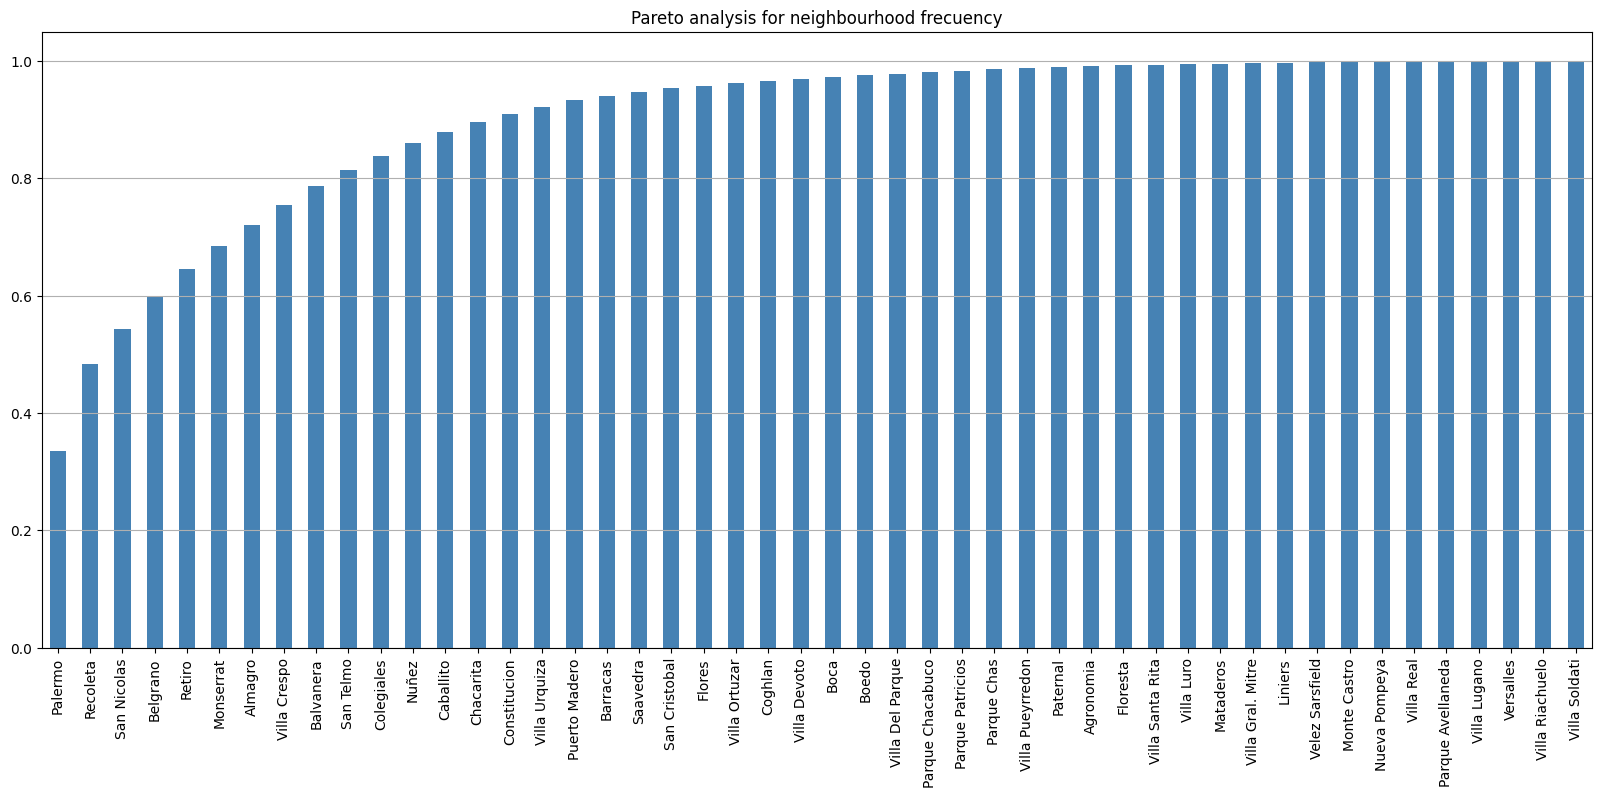

In [102]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()